# Regression on Galton Dataset

In [0]:
!pip install -U -q PyDrive
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# choose a local (colab) directory to store the data.
local_download_path = os.path.expanduser('~/Input Files')
try:
  os.makedirs(local_download_path)
except: pass

# 2. Auto-iterate using the query syntax
#    https://developers.google.com/drive/v2/web/search-parameters
file_list = drive.ListFile(
    {'q': "'1Kgq18d708injo7G3Xy2CbftbUd_hLiPV' in parents"}).GetList()

for f in file_list:
  # 3. Create & download by id.
  print('title: %s, id: %s' % (f['title'], f['id']))
  fname = os.path.join(local_download_path, f['title'])
  print('downloading to {}'.format(fname))
  f_ = drive.CreateFile({'id': f['id']})
  f_.GetContentFile(fname)  

title: height.csv, id: 1_bVaY9oTObO3YcWamwkrlK3Wal8Cry9v
downloading to /root/Input Files/height.csv


# Importing packages

In [0]:
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from matplotlib import style
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


# Experiment

In [0]:
path='/root/Input Files/'

In [0]:
data = pd.read_csv(path + 'height.csv')
data.head(6)

,Unnamed: 0,fheight,sheight
0,1,65.04851,59.77827
1,2,63.25094,63.21404
2,3,64.95532,63.34242
3,4,65.75250,62.79238
4,5,61.13723,64.28113
5,6,63.02254,64.24221


In [0]:
print(data.shape)
data = data.drop(['Unnamed: 0'],axis =1)

(1078, 3)


In [0]:
y = data.fheight
X = data.sheight

**Mean of Father's and son's height**

In [0]:
print('The mean height of father\' is {}'.format(y.mean()))
print('The mean height of son\'s is {}'.format(X.mean()))

The mean height of father' is 67.68709686456398
The mean height of son's is 68.68406965677181


**Histogram of Father's height and Son's height**

Text(0.5, 0, "Son's Height")

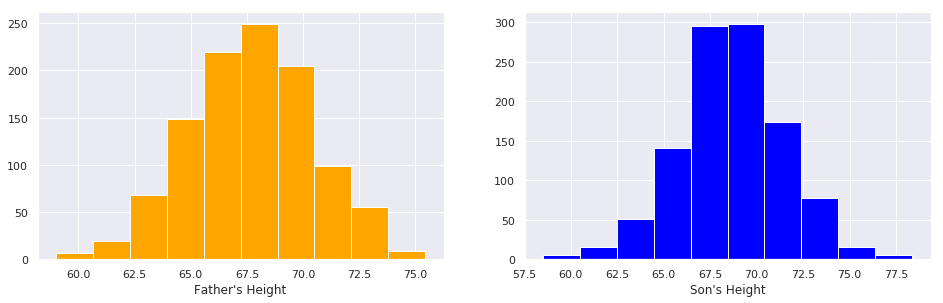

In [0]:
plt.figure(figsize=(16,10))

plt.subplot(2,2,1)
plt.hist(y, color='orange')
plt.xlabel("Father's Height")
 
# Scatter plot with line-fit

plt.subplot(2,2,2)
plt.hist(X,color='blue')
plt.xlabel("Son's Height")

**Getting correlation matrix of the data**

In [0]:
data.corr()

,fheight,sheight
fheight,1.000000,0.501338
sheight,0.501338,1.000000


In [0]:
def best_fit_slope_and_intercept(xs,ys):
    m = ((np.mean(xs*ys) - (np.mean(xs)*np.mean(ys))) /
         (np.mean(xs*xs) - np.mean(xs)*np.mean(xs)))
    b = np.mean(ys) - m*np.mean(xs)
    return m,b

**Scatter plot of Son's height vs. Father's height**


intercept: 34.107453116274286
slope: 0.4889000304742274


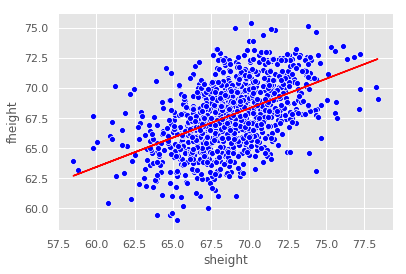

In [0]:
# Predicting father's height from son's height
m,b= best_fit_slope_and_intercept(X,y)
print("intercept:",b)
print("slope:",m)
regression_line = [(m*x)+b for x in X]
style.use('ggplot')
sns.scatterplot(x="sheight", y="fheight", data=data, color ='blue')
plt.plot(X, regression_line, color ='red')
plt.show()

**Scatter plot of Father's height vs. Son's height**


intercept: 33.88660435406246
slope: 0.5140930386235365


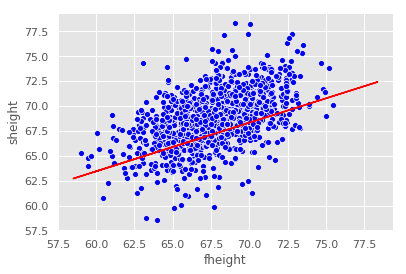

In [0]:
# predicting son's height from father's height
m,b= best_fit_slope_and_intercept(y, X)
print("intercept:",b)
print("slope:",m)
style.use('ggplot')
sns.scatterplot(x="fheight", y="sheight", data=data, color ='blue')
plt.plot(X, regression_line, color ='red')
plt.show()

### Linear Regression of son's height from father's height with Scikit-Learn

In [0]:
x = pd.Series(data['fheight'])
y = pd.Series(data['sheight'])
X = x[:,np.newaxis] # manipulate shape

**Coefficient & Intercept of the model**

In [0]:
model = LinearRegression().fit(X, y)
print('Coefficient: \n', model.coef_)
print('Intercept: \n', model.intercept_)

Coefficient: 
 [0.51409304]
Intercept: 
 33.88660435407794


**Getting the standard deviation of the data**

Residuals Standard Deviation: 2.44


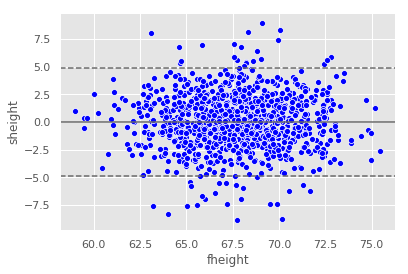

In [0]:
X = x[:,np.newaxis] # manipulate shape to row/col fmt
yPredict = model.predict(X) # predict y for x
resids = y - yPredict # series with delta between actual and predicted
 
sumSqrResids = np.square(resids).sum()
n = len(X)
residVar = sumSqrResids / (n -2)
residSD = np.sqrt(residVar)
print("Residuals Standard Deviation:", residSD.round(2))
sns.scatterplot(x, resids, color ="blue")
plt.axhline(y=0, color = "dimgrey")
plt.axhline(y=2*residSD, color = "dimgrey", linestyle='--' )
plt.axhline(y=-2*residSD, color = "dimgrey", linestyle='--' )
plt.show()

In [0]:
fatherCentered = data['fheight'] - np.mean(data['fheight'])
childCentered = data['sheight'] - np.mean(data['sheight'])
 
model.fit(fatherCentered.values.reshape(-1,1), childCentered)
print('Coefficient: \n', model.coef_)
print('Intercept: \n', model.intercept_)

Coefficient: 
 [0.51409304]
Intercept: 
 -2.364572461904533e-14


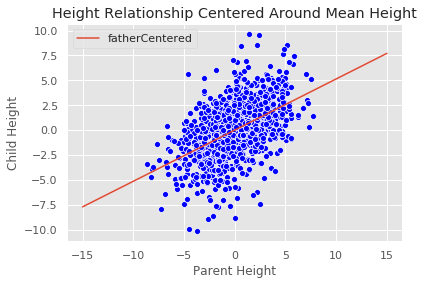

In [0]:
xpred = np.linspace(-15, 15).reshape(-1,1)
Fpred = model.predict(xpred)

sns.scatterplot(fatherCentered, childCentered, color ="blue")
 
plt.plot(xpred,Fpred)
 
plt.legend(["fatherCentered"])
plt.xlabel("Parent Height")
plt.ylabel("Child Height")
plt.title("Height Relationship Centered Around Mean Height")
plt.show()

In [0]:
def subset(height):
  data2  = data[(data['sheight'].round().astype(int) == height)]
  count = data2.shape[0]
  mean = data2.fheight.mean()
  return data2, mean, count

In [0]:
subset(65)[2]

52

**Function to fix a range of height to see the relation between Son's height and Father's height**

In [0]:
d1 = []
d2 = []
d3 = []
for i in range(60,77,1):
  d1.append(i)
  d2.append(subset(i)[1])
  d3.append(subset(i)[2])
d = {"Sons's Height":d1,"Father's mean height":d2, "Bucket Size":d3}
df = pd.DataFrame(d)
df.head()

,Sons's Height,Father's mean height,Bucket Size
0,60,66.099437,3
1,61,65.379153,6
2,62,65.775557,9
3,63,65.130066,16
4,64,64.841846,35


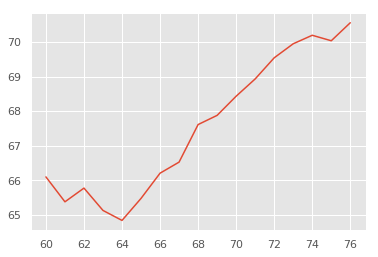

In [0]:
plt.plot(df["Sons's Height"],df["Father's mean height"])